In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,01-01-2004,08-04-2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT., HOSPITALIZATION","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITALISATION, DYSPNOEA"
1,65325,01-01-2004,08-04-2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER, REQ. INTERVENTION TO PRVNT PERM. IMPRMNT., HOSPITALIZATION","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITALISATION, DYSPNOEA"
2,65333,01-01-2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP ICE CREAM,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,01-01-2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,01-01-2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [3]:
df.shape

(90786, 12)

In [4]:
df['AEC_Event Start Date'] = pd.to_datetime(df['AEC_Event Start Date'])

In [5]:
df['CI_Age Unit'] = df['CI_Age Unit'].replace('Not Available',np.nan)
df['CI_Gender'] = df['CI_Gender'].replace('Female',0)
df['CI_Gender'] = df['CI_Gender'].replace('Male',1)
df = df.replace(' ',np.nan)

In [6]:
df['AEC_Event Start Date'].replace('', np.nan, inplace=True)
df.dropna(subset=['AEC_Event Start Date'], inplace=True)
df.shape

NumExpr defaulting to 4 threads.


(53653, 12)

In [7]:
data = df[['AEC_Event Start Date','CI_Gender']]

In [8]:
data.to_csv('q1.csv',index=False)

In [9]:
dt = pd.read_csv('q1.csv')

In [10]:
dt['CI_Gender'].unique()

array(['0', 'Not Available', '1', 'Unknown', 'Not Reported'], dtype=object)

In [11]:
years = []
for i in range(0,dt['AEC_Event Start Date'].shape[0]):
    date = pd.to_datetime(dt['AEC_Event Start Date'][i])
    date = str(date).split()[0]
    year = pd.to_numeric(date.split('-')[0])
    years.append(year)

In [12]:
dt['years'] = years

In [13]:
dt.head(2)

,AEC_Event Start Date,CI_Gender,years
0,2003-08-04,0,2003
1,2003-08-04,0,2003


In [14]:
data_count_by_year = dt.groupby('years')['CI_Gender'].count()

In [15]:
data_count_by_year = data_count_by_year.to_dict()

In [16]:
dt = dt[(dt['CI_Gender'].str.contains('0', na=False)) | (dt['CI_Gender'].str.contains('1', na=False))]
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 53652
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AEC_Event Start Date  50976 non-null  object
 1   CI_Gender             50976 non-null  object
 2   years                 50976 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [17]:
dt['CI_Gender'] = pd.to_numeric(dt['CI_Gender'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 53652
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AEC_Event Start Date  50976 non-null  object
 1   CI_Gender             50976 non-null  int64 
 2   years                 50976 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


In [18]:
dt.index = dt['years']

In [19]:
dt_zeros = dt.where(dt['CI_Gender'] == 0)
dt_ones = dt.where(dt['CI_Gender'] == 1)

In [20]:
dt_zeros = dt_zeros.dropna()
dt_ones = dt_ones.dropna()


In [21]:
dt_zeros = dt_zeros.groupby(dt_zeros.index)['CI_Gender'].count()
dt_ones = dt_ones.groupby(dt_ones.index)['CI_Gender'].count()

In [22]:
dt_zeros_female = dt_zeros.to_dict()
dt_ones_male = dt_ones.to_dict()

In [23]:
years = []
total_entries = []
male = []
female = []

for key,value in data_count_by_year.items():
    if key in dt_zeros_female:
        female.append(dt_zeros_female[key])
    else:
        female.append(0)
    if key in dt_ones_male:
        male.append(dt_ones_male[key])
    else:
        male.append(0)
    years.append(key)
    total_entries.append(value)


In [24]:
d = {'Years' : years,
    'Male' : male,
    'Female' : female,
    'Total_entries' : total_entries}
final_df = pd.DataFrame(d)

In [25]:
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    return round(percentage,2)

# print(percentage(3, 5))

In [26]:
male_percent_list = []
female_percent_list = []
for index, row in final_df.iterrows():
    male_percent = percentage(row['Male'], row['Total_entries'])
    female_percent = percentage(row['Female'], row['Total_entries'])
    male_percent_list.append(male_percent)
    female_percent_list.append(female_percent)

In [27]:
final_df['Male_percentage'] = male_percent_list
final_df['Female_percentage'] = female_percent_list

In [28]:
final_df.head(10)

,Years,Male,Female,Total_entries,Male_percentage,Female_percentage
0,1931,1,0,1,100.0,0.0
1,1950,4,0,4,100.0,0.0
2,1954,2,0,2,100.0,0.0
3,1956,0,5,5,0.0,100.0
4,1959,0,1,1,0.0,100.0
5,1960,0,1,1,0.0,100.0
6,1965,0,1,1,0.0,100.0
7,1967,0,1,1,0.0,100.0
8,1979,0,1,1,0.0,100.0
9,1982,0,1,1,0.0,100.0


<Figure size 720x2160 with 0 Axes>

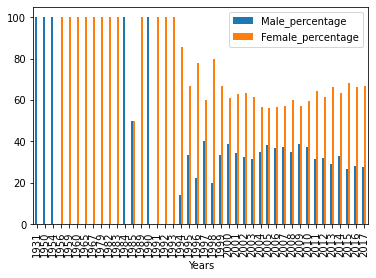

In [29]:
plt.figure(figsize=(10,30))
final_df.plot('Years',['Male_percentage','Female_percentage'],kind='bar')
plt.show()

In [30]:
from bokeh.plotting import figure, show
from bokeh.models import DatetimeTickFormatter

In [31]:
p = figure(title="Simple line example", x_axis_label= 'Years', y_axis_label='Percentage')
p.width = 1000
p.height = 1000
p.sizing_mode = 'stretch_both'
p.xgrid.grid_line_color = "red"
# p.line(final_df.Years, final_df.Male_percentage, legend_label="Percentage of Male", line_width=2,line_color='red')
# p.line(final_df.Years, final_df.Female_percentage, legend_label="Percentage of Females", line_width=2,line_color='blue')
# p.circle(final_df.Years, final_df.Male_percentage, legend_label="Objects", line_color="red", size=5,fill_color='red')
# p.vbar(x=final_df.Years, top=final_df.Male_percentage, legend_label="Male", width=0.6, bottom=0, color="red",)
p.vbar(x=final_df.Years, top=final_df.Female_percentage, legend_label="Female", width=0.5, bottom=0, color="blue")
p.vbar(x=final_df.Years, top=final_df.Male_percentage, legend_label="Male", width=0.6, bottom=0, color="red",hover_line_color="darkgrey")
# p.xaxis[0].formatter = DatetimeTickFormatter(years=["%Y"])
# show(p)

In [ ]:
import plotly.express as px


In [38]:
# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(final_df, x='Years', y='Male_percentage',color='Male_percentage')
fig = px.bar(final_df, x='Years', y='Female_percentage',color='Female_percentage')
fig.show()